In [1]:
non_corr= "MAZ_non_corr/1-100/Moreau80_GBOOKS.json"
corr = "MAZ_corr/1-100/Moreau80_GBOOKS.json"

In [2]:
import json
from pathlib import Path

In [3]:
with open(non_corr) as f:
    nc = json.load(f)
    
with open(corr) as f:
    c = json.load(f)

In [4]:
txt_nc = nc["texte"]
txt_c = c["texte"]

In [5]:
for i, (page_nc, page_c) in enumerate(zip(txt_nc, txt_c), 1):
    print(i, page_c == page_nc)

1 True
2 True
3 True
4 True
5 True
6 True


In [6]:
corr = Path("MAZ_corr")
non_corr = Path("MAZ_non_corr")

In [7]:
corr_files = set((e.name for e in corr.glob("*/*"))) 
non_corr_files = set((e.name for e in non_corr.glob("*/*")))

In [8]:
common = corr_files & non_corr_files

In [9]:
len(common)

2285

In [10]:
corr_n_non_corr = []

for file_c in corr.glob("*/*"):
    # print(file_c)
    # print(list(file_c.parents))
    
    file_nc = non_corr / file_c.relative_to(corr)
    
    # print(file_nc)
    # print(file_nc.exists())
    # if file_nc.exists():
    #     1/0
        
    if not file_nc.exists():
        type_ = "C"
    else:
        with open(file_c) as f:
            c = json.load(f)
        with open(file_nc) as f:
            nc = json.load(f)
            
        txt_nc = nc["texte"]
        txt_c = c["texte"]
        
        if txt_nc == txt_c:
            type_ = "A"
        else:
            type_ = "B"
            
    corr_n_non_corr.append((file_c, type_))
    
    

In [11]:
files_by_type = {
    "A": [],
    "B": [],
    "C": []
}

for file, type_ in corr_n_non_corr:
    files_by_type[type_].append(file)
    


In [12]:
for k, v in files_by_type.items():
    print(k, len(v))

A 151
B 787
C 2127


In [13]:
for e in files_by_type["B"]:
    print(e)

MAZ_corr/1-100/Moreau19_GBOOKS.json
MAZ_corr/1-100/Moreau30_MAZ.json
MAZ_corr/1-100/Moreau3_MAZ.json
MAZ_corr/1-100/Moreau42_MAZ.json
MAZ_corr/1-100/Moreau59_MAZ.json
MAZ_corr/1-100/Moreau81_MAZ.json
MAZ_corr/1-100/Moreau83_MAZ.json
MAZ_corr/1-100/Moreau95_GBOOKS.json
MAZ_corr/1-100/Moreau97_GBOOKS.json
MAZ_corr/1-100/Moreau98_MAZ.json
MAZ_corr/1-100/Moreau99_GBOOKS.json
MAZ_corr/1001-1100/Moreau1001_GBOOKS.json
MAZ_corr/1001-1100/Moreau1002_GBOOKS.json
MAZ_corr/1001-1100/Moreau1005_GBOOKS.json
MAZ_corr/1001-1100/Moreau1006_MAZ.json
MAZ_corr/1001-1100/Moreau1007_GBOOKS.json
MAZ_corr/1001-1100/Moreau1008_GBOOKS.json
MAZ_corr/1001-1100/Moreau1009_MAZ.json
MAZ_corr/1001-1100/Moreau1010_GBOOKS.json
MAZ_corr/1001-1100/Moreau1012_GBOOKS.json
MAZ_corr/1001-1100/Moreau1016_GBOOKS.json
MAZ_corr/1001-1100/Moreau1018_GBOOKS.json
MAZ_corr/1001-1100/Moreau1019_GBOOKS.json
MAZ_corr/1001-1100/Moreau1020_GBOOKS.json
MAZ_corr/1001-1100/Moreau1021_GBOOKS.json
MAZ_corr/1001-1100/Moreau1023_GBOOKS.json
MA

In [14]:
def how_many_pages(lst1, lst2):  
    if not lst1 or not lst2:
        raise ValueError("Empty list")
    
    how_many = 0

    if len(lst1) < len(lst2):
        lst1, lst2 = lst2, lst1
        
    for p in lst1:
        if p not in lst2:
            how_many += 1
            
            
    return how_many



In [15]:
how_many_for_b = []
toremove = []

for file_c in files_by_type["B"]:
    file_nc = non_corr / file_c.relative_to(corr)
    
    with open(file_c) as f:
        c = json.load(f)
    with open(file_nc) as f:
        nc = json.load(f)
        
    txt_nc = nc["texte"]
    txt_c = c["texte"]
    
    try:
        hmp = how_many_pages(txt_nc, txt_c)        
    except ValueError:
        toremove.append(file_c)
        files_by_type["C"].append(file_c)
        continue
        
    how_many_for_b.append(
        {
            "file": file_c,
            "how_many": hmp,
            "len_c": len(txt_c),
            "len_nc": len(txt_nc),
            "same_len": len(txt_c) == len(txt_nc),
            "ratio": hmp / max(len(txt_c), len(txt_nc))
        }
    )
    
for e in toremove:
    files_by_type["B"].remove(e)
    

In [16]:
how_many_for_b

[{'file': PosixPath('MAZ_corr/1-100/Moreau19_GBOOKS.json'),
  'how_many': 23,
  'len_c': 21,
  'len_nc': 23,
  'same_len': False,
  'ratio': 1.0},
 {'file': PosixPath('MAZ_corr/1-100/Moreau30_MAZ.json'),
  'how_many': 15,
  'len_c': 14,
  'len_nc': 15,
  'same_len': False,
  'ratio': 1.0},
 {'file': PosixPath('MAZ_corr/1-100/Moreau3_MAZ.json'),
  'how_many': 4,
  'len_c': 16,
  'len_nc': 16,
  'same_len': True,
  'ratio': 0.25},
 {'file': PosixPath('MAZ_corr/1-100/Moreau42_MAZ.json'),
  'how_many': 1,
  'len_c': 4,
  'len_nc': 4,
  'same_len': True,
  'ratio': 0.25},
 {'file': PosixPath('MAZ_corr/1-100/Moreau59_MAZ.json'),
  'how_many': 23,
  'len_c': 20,
  'len_nc': 23,
  'same_len': False,
  'ratio': 1.0},
 {'file': PosixPath('MAZ_corr/1-100/Moreau81_MAZ.json'),
  'how_many': 11,
  'len_c': 9,
  'len_nc': 11,
  'same_len': False,
  'ratio': 1.0},
 {'file': PosixPath('MAZ_corr/1-100/Moreau83_MAZ.json'),
  'how_many': 31,
  'len_c': 22,
  'len_nc': 31,
  'same_len': False,
  'ratio': 1

In [17]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
df = pd.DataFrame(how_many_for_b)

In [19]:
df["ratio"] = df["ratio"].round(2)

In [20]:
df["ratio"].value_counts()

ratio
1.00    198
0.50     58
0.86     42
0.43     36
0.33     30
       ... 
0.02      1
0.03      1
0.22      1
0.01      1
0.77      1
Name: count, Length: 67, dtype: int64

In [21]:
df["ratio"].value_counts().sort_index()

ratio
0.01      1
0.02      1
0.03      1
0.04      1
0.05      4
       ... 
0.96      8
0.97     18
0.98      6
0.99      7
1.00    198
Name: count, Length: 67, dtype: int64

<Axes: xlabel='ratio'>

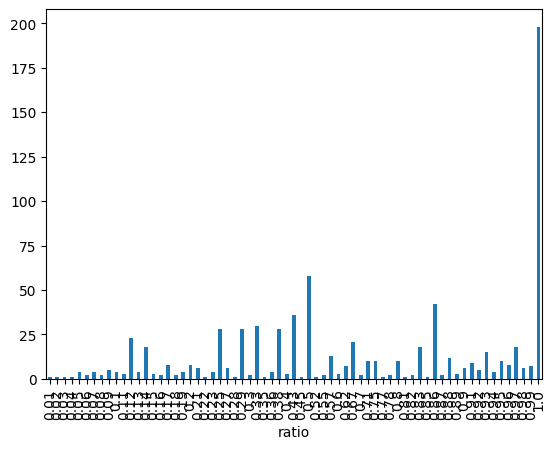

In [22]:
df["ratio"].value_counts().sort_index().plot.bar()

<Axes: xlabel='how_many'>

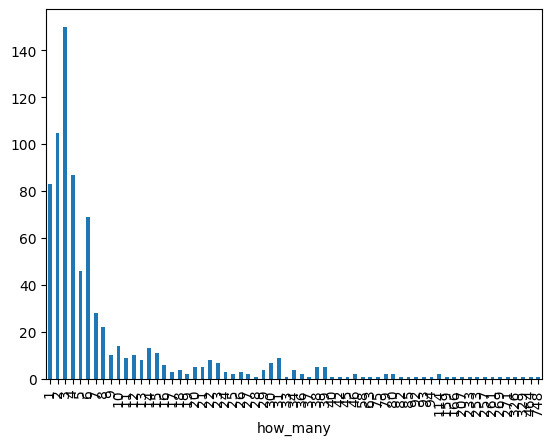

In [23]:
df["how_many"].value_counts().sort_index().plot.bar()

<Axes: xlabel='hm10'>

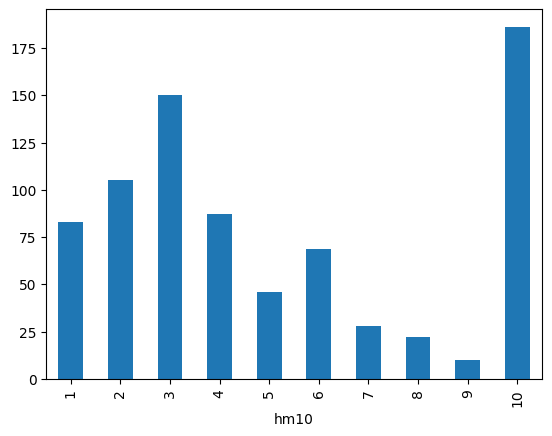

In [24]:
df["hm10"] = df["how_many"].apply(lambda x: x if x < 10 else 10)
df["hm10"].value_counts().sort_index().plot.bar()

<Axes: xlabel='hm5'>

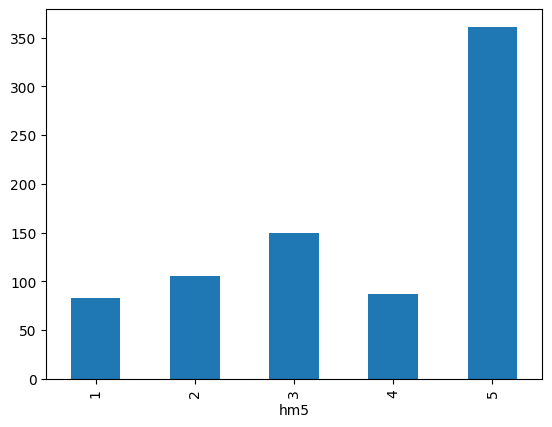

In [25]:
df["hm5"] = df["how_many"].apply(lambda x: x if x < 5 else 5)
df["hm5"].value_counts().sort_index().plot.bar()

In [28]:
corr_from_xml = 0
non_corr_from_xml = 0
for e in files_by_type["B"]:
    with open(e) as f:
        e = json.load(f)
    if e.get("entête", {}).get("change", {}).get("@status", "") == "corrected":
        corr_from_xml += 1
    else:
        non_corr_from_xml += 1
        
print(corr_from_xml, non_corr_from_xml)

786 0
